In [1]:
%load_ext autoreload
%autoreload 2
import eval_models
import pandas as pd
import numpy as np
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_art,y_art,X_dig,y_dig= eval_models.get_data()
X_art_train,X_art_test,y_art_train,y_art_test=train_test_split(X_art,y_art,stratify=y_art,test_size=0.25)

## No standarization at all

In [3]:
RF = RandomForestClassifier(n_jobs=-1, max_depth=6)
feat_select = BorutaPy(RF, n_estimators='auto', verbose=0)
feat_select.fit(X_art_train.values,y_art_train)
X_art_train_boruta=X_art_train.iloc[:,feat_select.support_]
X_art_test_boruta=X_art_test.iloc[:,feat_select.support_]

In [4]:
noscaling_res=eval_models.get_models_ba(X_art_train_boruta,
                              X_art_test_boruta,
                              y_art_train,
                              y_art_test,
                              logistic_args={"max_iter":1000}
                             )
print("no of features:",len(X_art_train_boruta.columns))

LogisticRegression 0.614
RandomForestClassifier 0.876
AdaBoostClassifier 0.624
LGBMClassifier 0.852
XGBClassifier 0.858
no of features: 20


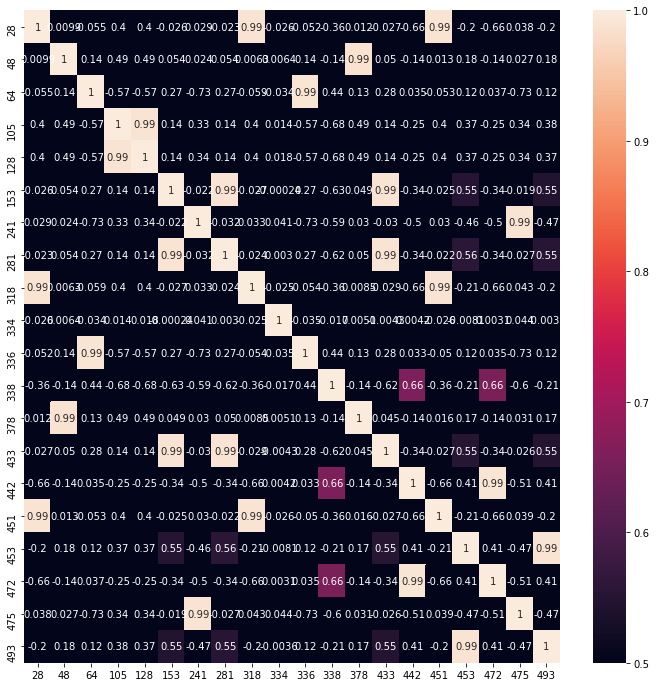

In [5]:
plt.figure(figsize=(12,12))
corr = X_art_train_boruta.corr()
sns.heatmap(corr,annot=True,vmin=0.5,vmax=1)
plt.show()

In [6]:
X_train_no_corr=eval_models.delete_corr(X_art_train_boruta)

In [7]:
noscaling_res_cor=eval_models.get_models_ba(X_train_no_corr,
                              X_art_test_boruta,
                              y_art_train,
                              y_art_test,
                              logistic_args={"max_iter":1000}
                             )
print("no of features:",len(X_train_no_corr.columns))

LogisticRegression 0.598
RandomForestClassifier 0.86
AdaBoostClassifier 0.612
LGBMClassifier 0.838
XGBClassifier 0.828
no of features: 10


## Standarization after Boruta

In [8]:
X_art_train_boruta_sc,X_art_test_boruta_sc=eval_models.standarize(X_art_train_boruta,X_art_test_boruta)

In [9]:
X_train_no_corr2=eval_models.delete_corr(X_art_train_boruta_sc)

In [10]:
noscaling_res_cor=eval_models.get_models_ba(X_train_no_corr2,
                              X_art_test_boruta_sc,
                              y_art_train,
                              y_art_test,
                              logistic_args={"max_iter":1000}
                             )
print("no of features:",len(X_train_no_corr2.columns))

LogisticRegression 0.622
RandomForestClassifier 0.846
AdaBoostClassifier 0.612
LGBMClassifier 0.844
XGBClassifier 0.828
no of features: 10


## Standarization before Boruta

In [11]:
X_art_train_sc,X_art_test_sc=eval_models.standarize(X_art_train,X_art_test)

In [12]:
### (suggested max_depth between 3 and 7) podobno
RF = RandomForestClassifier(n_jobs=-1, max_depth=7)
feat_select = BorutaPy(RF, n_estimators='auto', verbose=0)
feat_select.fit(X_art_train_sc.values,y_art_train)
X_art_train_sc_boruta=X_art_train_sc.iloc[:,feat_select.support_]
X_art_test_sc_boruta=X_art_test_sc.iloc[:,feat_select.support_]

In [13]:
scaled_res=eval_models.get_models_ba(X_art_train_sc_boruta,
                              X_art_test_sc_boruta,
                              y_art_train,
                              y_art_test,
                              logistic_args={"max_iter":1000}
                             )
print("no of features:",len(X_art_train_sc_boruta.columns))

LogisticRegression 0.604
RandomForestClassifier 0.882
AdaBoostClassifier 0.622
LGBMClassifier 0.846
XGBClassifier 0.83
no of features: 21


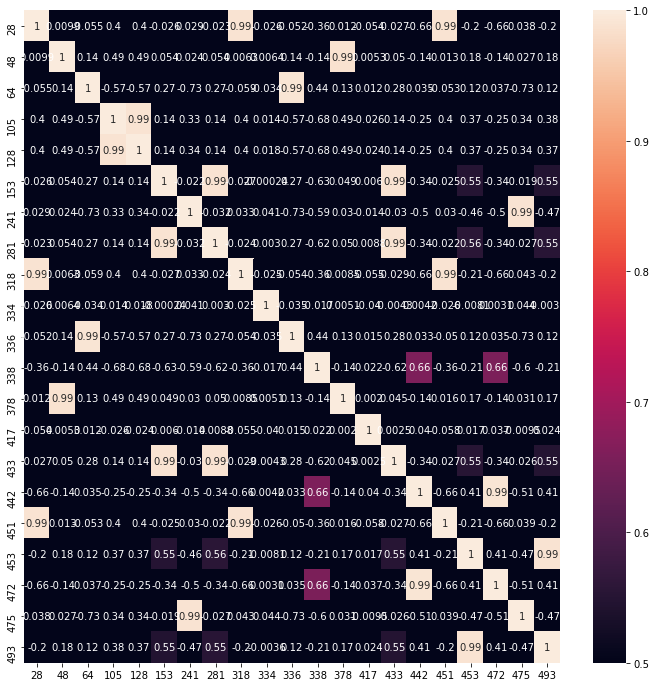

In [14]:
plt.figure(figsize=(12,12))
corr = X_art_train_sc_boruta.corr()
sns.heatmap(corr,annot=True,vmin=0.5,vmax=1)
plt.show()

In [15]:
X_art_train_sc_no_corr=eval_models.delete_corr(X_art_train_sc_boruta)

In [16]:
scaled_res_cor=eval_models.get_models_ba(X_art_train_sc_no_corr,
                              X_art_test_sc_boruta,
                              y_art_train,
                              y_art_test,
                              logistic_args={"max_iter":1000}
                             )
print("no of features:",len(X_art_train_sc_no_corr.columns))

LogisticRegression 0.596
RandomForestClassifier 0.846
AdaBoostClassifier 0.618
LGBMClassifier 0.832
XGBClassifier 0.826
no of features: 11
